In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"/content/data_all.csv", encoding="latin1")

## checking null values

In [9]:
print(df.isnull().sum())


id                    0
MonsoonIntensity      0
TopographyDrainage    0
RiverManagement       0
Deforestation         0
                     ..
cnt_14                1
cnt_15                1
mmd2                  1
mac                   1
MAD                   1
Length: 75, dtype: int64


In [10]:
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,cnt_9,cnt_10,cnt_11,cnt_12,cnt_13,cnt_14,cnt_15,mmd2,mac,MAD
0,0,0.039335,1.467011,0.020654,1.489348,0.508518,-0.453698,-0.458827,-0.932697,-0.938761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-0.050968,0.674861
1,1,0.525633,0.989450,-0.461971,-0.459918,1.468781,1.489614,-0.938314,0.034964,-0.455784,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,-0.076563,0.902128
2,2,0.525633,0.034328,0.503280,1.002031,-0.931878,1.003786,-1.897287,0.034964,-0.455784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,-0.076563,0.756135
3,3,-0.933262,-0.443233,0.503280,0.027398,-0.451746,1.489614,-0.458827,1.002626,0.510172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.050606,0.646598
4,4,0.039335,-0.920793,-1.427222,0.514715,-0.451746,-0.453698,-0.938314,-0.932697,-0.938761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,-0.000583,0.608820


In [11]:
print(df.columns.tolist())  # Print column names exactly as they are


['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors', 'FloodProbability', 'type', 'ClimateAnthropogenicInteraction', 'InfrastructurePreventionInteraction', 'sum', 'std', 'mean', 'max', 'min', 'mode', 'median', 'q_25th', 'q_75th', 'skew', 'kurt', 'sum_72_76', '10th', '20th', '30th', '40th', '50th', '60th', '70th', '80th', '90th', 'harmonic', 'geometric', 'zscore', 'cv', 'Skewness_75', 'Skewness_25', '2ndMoment', '3rdMoment', 'entropy', 'rng', 'cnt_0', 'cnt_1', 'cnt_2', 'cnt_3', 'cnt_4', 'cnt_5', 'cnt_6', 'cnt_7', 'cnt_8', 'cnt_9', 'cnt_10', 'cnt_11', 'cnt_12', 'cnt_13', 'cnt_14', 'cnt_15', 'mmd2', 'mac', 'MAD']


# Target variable

In [12]:

flood_features =[
    "MonsoonIntensity", "TopographyDrainage", "RiverManagement", "Deforestation",
    "Urbanization", "ClimateChange", "DamsQuality", "Siltation", "AgriculturalPractices",
    "Encroachments", "DrainageSystems",
    "CoastalVulnerability", "Landslides", "Watersheds",
    "PopulationScore", "WetlandLoss"
]
df_flood = df[flood_features]

In [13]:
df_flood.shape

(8041, 16)

In [14]:
y = df['FloodProbability']

In [15]:
df_flood.head(6)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,PopulationScore,WetlandLoss
0,0.039335,1.467011,0.020654,1.489348,0.508518,-0.453698,-0.458827,-0.932697,-0.938761,-0.456037,0.026184,-0.936056,-0.928460,0.033750,0.999385,0.024238
1,0.525633,0.989450,-0.461971,-0.459918,1.468781,1.489614,-0.938314,0.034964,-0.455784,0.504258,0.991280,-1.414787,-2.371757,-0.926508,-0.929273,-0.943079
2,0.525633,0.034328,0.503280,1.002031,-0.931878,1.003786,-1.897287,0.034964,-0.455784,0.024110,0.991280,-0.936056,0.995936,0.033750,1.481549,-1.426738
3,-0.933262,-0.443233,0.503280,0.027398,-0.451746,1.489614,-0.458827,1.002626,0.510172,1.464552,-1.421459,-0.457324,0.995936,-0.446379,0.517220,0.024238
4,0.039335,-0.920793,-1.427222,0.514715,-0.451746,-0.453698,-0.938314,-0.932697,-0.938761,-0.936185,-1.421459,-1.414787,0.514837,0.513878,-1.893602,-1.426738
5,0.039335,-0.443233,-1.909847,-0.459918,-1.412010,-0.453698,0.500146,0.518795,0.993149,0.024110,-0.938911,0.021407,0.033738,-0.446379,0.517220,1.475215


In [16]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [17]:
target = "FloodProbability"
df.fillna(df.mean(), inplace=True)
x = df[flood_features]
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(f"Training data : {x_train.shape[0]}, test data : {x_test.shape[0]}")

Training data : 6432, test data : 1609


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### 1.Missing values
### 2.explore about numerical variables
### 3.categorical
### 4.relationship between features

In [19]:
df_flood.isnull().sum()

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


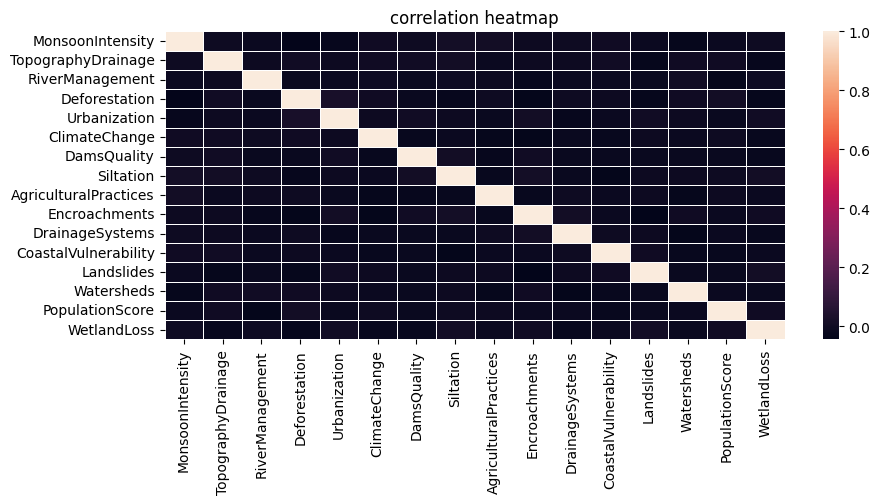

In [20]:
corr_matrix = df_flood.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr_matrix, fmt=".2f", linewidths=0.5)
plt.title("correlation heatmap")
plt.show()

In [21]:
df_flood.head

<bound method NDFrame.head of       MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0             0.039335            1.467011         0.020654       1.489348   
1             0.525633            0.989450        -0.461971      -0.459918   
2             0.525633            0.034328         0.503280       1.002031   
3            -0.933262           -0.443233         0.503280       0.027398   
4             0.039335           -0.920793        -1.427222       0.514715   
...                ...                 ...              ...            ...   
8036          0.525633           -0.920793        -1.427222       1.489348   
8037          1.011931            1.467011         0.020654       1.002031   
8038          0.525633            0.034328        -0.944596       1.002031   
8039         -0.933262           -0.443233        -0.944596      -0.459918   
8040         -1.419560            0.034328         0.503280      -0.459918   

      Urbanization  ClimateChange  DamsQuality  Siltation  \
0         0.508518      -0.453698    -0.458827  -0.932697   
1         1.468781       1.489614    -0.938314   0.034964   
2        -0.931878       1.003786    -1.897287   0.034964   
3        -0.451746       1.489614    -0.458827   1.002626   
4        -0.451746      -0.453698    -0.938314  -0.932697   
...            ...            ...          ...        ...   
8036     -0.931878      -0.939526    -0.938314  -0.448867   
8037     -0.931878       0.032130    -0.458827  -0.932697   
8038      0.508518      -0.453698     0.020659  -1.416528   
8039     -0.451746      -1.425354     1.459119  -0.932697   
8040      0.028386       1.489614    -1.897287  -0.448867   

      AgriculturalPractices  Encroachments  DrainageSystems  \
0                 -0.938761      -0.456037         0.026184   
1                 -0.455784       0.504258         0.991280   
2                 -0.455784       0.024110         0.991280   
3                  0.510172       1.464552        -1.421459   
4                 -0.938761      -0.936185        -1.421459   
...                     ...            ...              ...   
8036               0.027194      -0.456037        -0.456363   
8037               1.959105      -1.416332        -0.456363   
8038              -0.938761      -0.456037         1.473828   
8039              -0.938761      -0.456037         0.026184   
8040              -1.421739      -0.936185         0.026184   

      CoastalVulnerability  Landslides  Watersheds  PopulationScore  \
0                -0.936056   -0.928460    0.033750         0.999385   
1                -1.414787   -2.371757   -0.926508        -0.929273   
2                -0.936056    0.995936    0.033750         1.481549   
3                -0.457324    0.995936   -0.446379         0.517220   
4                -1.414787    0.514837    0.513878        -1.893602   
...                    ...         ...         ...              ...   
8036             -0.457324   -0.928460   -1.886765         0.035056   
8037              0.021407   -0.447361    0.033750         0.517220   
8038              0.500139    0.514837   -0.926508         0.517220   
8039             -0.457324    0.033738    0.994007         0.999385   
8040             -0.457324    0.033738    0.994007         0.035056   

      WetlandLoss  
0        0.024238  
1       -0.943079  
2       -1.426738  
3        0.024238  
4       -1.426738  
...           ...  
8036    -0.459420  
8037     0.024238  
8038     0.024238  
8039     0.507897  
8040     0.991556  

[8041 rows x 16 columns]>

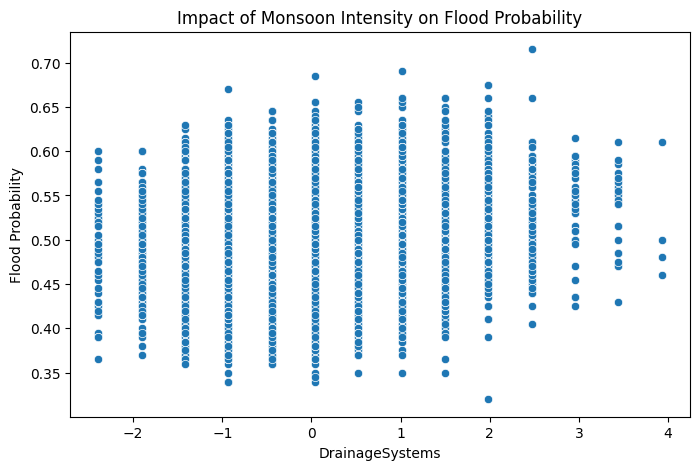

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["MonsoonIntensity"], y=df["FloodProbability"])
plt.xlabel("DrainageSystems")
plt.ylabel("Flood Probability")
plt.title("Impact of Monsoon Intensity on Flood Probability")
plt.show()


In [23]:
df_flood.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,PopulationScore,WetlandLoss
count,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000
mean,-0.017091,-0.007245,-0.001973,0.000248,-0.000634,0.001437,0.000146,-0.005109,0.002748,-0.008015,0.007701,-0.015029,0.005617,-0.004883,-0.003560,0.001983
std,0.993167,0.991652,1.002114,0.984989,0.995661,1.003550,1.008467,1.000893,0.993210,1.000453,1.006408,0.970172,0.994572,1.002288,1.017247,1.011501
min,-2.392157,-2.353476,-2.392472,-2.409185,-2.372274,-2.397010,-2.376773,-2.384190,-2.387694,-2.376627,-2.386555,-2.372250,-2.371757,-2.366894,-2.375766,-2.394055
25%,-0.933262,-0.920793,-0.461971,-0.459918,-0.931878,-0.939526,-0.938314,-0.932697,-0.938761,-0.936185,-0.938911,-0.936056,-0.928460,-0.926508,-0.929273,-0.459420
50%,0.039335,0.034328,0.020654,0.027398,0.028386,0.032130,0.020659,0.034964,0.027194,0.024110,0.026184,0.021407,0.033738,0.033750,0.035056,0.024238
75%,0.525633,0.511889,0.503280,0.514715,0.508518,0.517958,0.500146,0.518795,0.510172,0.504258,0.508732,0.500139,0.514837,0.513878,0.517220,0.507897
max,3.929721,4.332376,5.329533,4.900564,5.309837,4.890411,4.336038,4.873272,4.373993,4.345437,4.851663,4.808722,5.325827,3.874779,5.821028,4.377167


In [24]:
df_flood.duplicated().sum()

0

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

x = df_flood.drop(columns=["RiverManagement", "Urbanization", "ClimateChange", "PopulationScore"])

X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2,random_state=42)

model =RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

print("MSE", mean_squared_error(Y_test,Y_pred))

MSE 0.0016402532256059657


## low mse => model fits well
## checking for overfitting

In [26]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test,Y_pred)
print(f'R2 score :{r2}')

R2 score :0.3674057182842715


In [27]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(Y_train, model.predict(X_train))
test_mse = mean_squared_error(Y_test, Y_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


Train MSE: 0.000225850074626866
Test MSE: 0.0016402532256059657


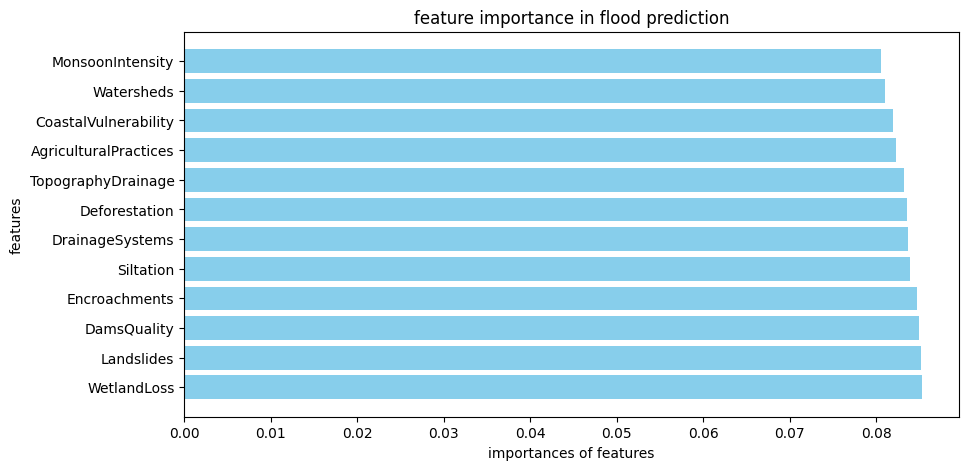

In [28]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = model.feature_importances_
features = X_train.columns

sorted_index = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10,5))
plt.barh(np.array(features)[sorted_index],feature_importance[sorted_index],color="skyblue")
plt.xlabel("importances of features")
plt.ylabel("features")
plt.title("feature importance in flood prediction")
plt.show()

## not much overfitting

### Trying out xgboost for improving the model

In [29]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
)

xgb_model.fit(X_train,Y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
train_mse = mean_squared_error(Y_train,y_pred_train)
test_mse = mean_squared_error(Y_test,y_pred_test)

print(f"Train MSE xgb: {train_mse}")
print(f"Test MSE xgb:{test_mse} ")


Train MSE xgb: 0.0005180149841829474
Test MSE xgb:0.0015640220152595204 


# Conclusion

### Model is predicting well with a slight overfitting issue with